# Training on cumstom dataset with YOLOv8
run after YOLOv8-Custom-Training.ipynb tutorial:
https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb

https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

Models
YOLOv8 Detect, Segment and Pose models pretrained on the COCO dataset are available here, as well as YOLOv8 Classify models pretrained on the ImageNet dataset. Track mode is available for all Detect, Segment and Pose models.

## 1. Setup


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


In [ ]:
# imports
import torch
import os
from IPython.display import Image, clear_output  # to display images
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import numpy as np
import cv2
from ultralytics import YOLO

In [ ]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.4.0+cu121 (CPU)


## 2. Load custom dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_path = '/content/drive/MyDrive/mosquito_comp_vision_v1/images/e6a62a4d-dd04-4321-9397-48cc57e9bfd3.jpeg'

In [ ]:
img_label_path = '/content/drive/MyDrive/mosquito_comp_vision_v1/labels/e6a62a4d-dd04-4321-9397-48cc57e9bfd3.txt'

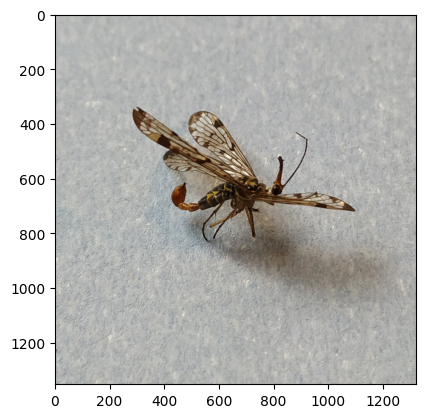

In [ ]:
%matplotlib inline
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

Here is a placeholder for first task: visualising image with bounding boxes, read from label file, bounding boxes are YOLOv8 notation:
https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#21-create-datasetyaml 2.2 Create Labels (I know it is YOLOv5 not YOLOv8, but the labels format is the same and it is better explained here)

*TODO* add codes for visualise bounding boxes

In [ ]:
# Read info from the label
with open(img_label_path) as f:
  info = f.read().strip()
coord = info.split()

# Denormalize coordinates
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height, width = img.shape[:2]

center_x = float(coord[1]) * width
center_y = float(coord[2]) * height

rect_width = float(coord[3]) * width
rect_height = float(coord[4]) * height

top_left = (int(center_x - rect_width / 2), int(center_y - rect_height / 2))
bottom_right = (int(center_x + rect_width / 2), int(center_y + rect_height / 2))

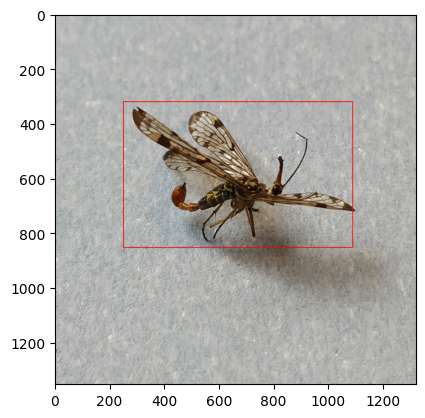

In [ ]:
cv2.rectangle(img, top_left, bottom_right, color=(255,0,0), thickness=2)
imgplot = plt.imshow(img)
plt.show()

*TODO* add codes to crop the image according to the bounding box



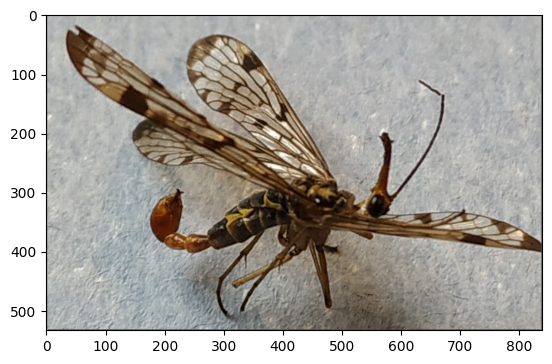

In [ ]:
cropped_img = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
imgplot = plt.imshow(cropped_img)
plt.show()